Here is a list of all our calculated variables: 


[(1, 'Average Velocity (mph)'), (2, 'Max Velocity'), (3, 'Velocity Stdev'), (4, 'Average Acceleration (mph per s)'), (5, 'Max Acceleration (mph per s)'), (6, ' Acceleration Stdev'), (7, 'Displacement'), (8, 'Total Distance Traveled'), (9, 'Max Direction Change per sec'), (10, ' Direction Stdev'), (11, 'Time (s)'), (12, 'Turns'), (13, 'Aggressive Turns'), (14, 'Stops'), (15, 'Large Deceleration Events'), (16, 'Deceleration Events'), (17, 'Max Deceleration Event')]


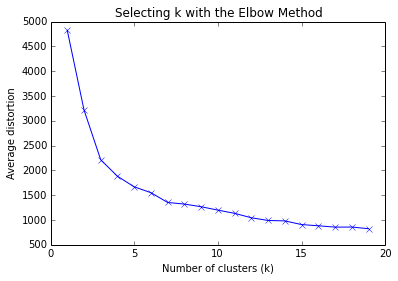

('For n_clusters =\n', 3, 'The average silhouette_score is :', 0.58511308599974932)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     576.8
Date:                Sun, 10 May 2015   Prob (F-statistic):               0.00
Time:                        02:39:44   Log-Likelihood:                -4502.2
No. Observations:                4600   AIC:                             9038.
Df Residuals:                    4583   BIC:                             9148.
Df Model:                          17                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0689      0.003     26.943    

In [13]:
# -*- coding: utf-8 -*-

###############################################################################
# Information
###############################################################################
# Created by Linwood Creekmore 

# May 10, 2015

# https://plus.google.com/+LinwoodCreekmoreIII/

###############################################################################
# Imports
###############################################################################

import os
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import silhouette_samples, silhouette_score


###############################################################################
# Data Load
###############################################################################
path = os.path.abspath(os.getcwd())
with open(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv'))) as in_data:
    skid_data = pd.DataFrame.from_csv(in_data, sep=',')


print ("Here is a list of all our calculated variables: \n\n")
print (list(enumerate(skid_data.columns[1:],start = 1)))

#Loading into the numpy array
as_array = np.asfarray(skid_data[['Average Velocity (mph)','Max Velocity', 'Velocity Stdev','Average Acceleration (mph per s)', 'Max Acceleration (mph per s)', ' Acceleration Stdev','Displacement','Total Distance Traveled','Max Direction Change per sec', ' Direction Stdev','Time (s)', 'Turns', 'Aggressive Turns', 'Stops', 'Large Deceleration Events', 'Deceleration Events', 'Max Deceleration Event']])
another_array = np.asfarray(skid_data[['Average Velocity (mph)','Displacement','Total Distance Traveled',' Direction Stdev','Time (s)', 'Max Deceleration Event']])


# preprocessing tricks
imputer = Imputer(missing_values="NaN", strategy="mean")
patched = imputer.fit_transform(as_array)
anotherpatched = imputer.fit_transform(another_array)

###############################################################################
# Pick a k using elbow method
###############################################################################

K = range(1,20)
meandisortions = []


for k in K:
	kmeans = KMeans(n_clusters = k)
	kmeans.fit(patched)
	meandisortions.append(sum(np.min(cdist(patched,kmeans.cluster_centers_,'euclidean'),axis=1))/patched.shape[0])

plt.plot(K,meandisortions,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()


###############################################################################
# K-Means
###############################################################################

n_clusters=3 
cluster = KMeans(n_clusters=n_clusters, n_init = 10)
second = KMeans(n_clusters=n_clusters,n_init=10)
cluster.fit_predict(patched)
second.fit_predict(anotherpatched)
classified_data = cluster.labels_
morelabels = second.labels_

###############################################################################################
# Evaluate how good clusters are usng Silhouette Coefficient; lowest score is -1, highest is 1
###############################################################################################

silhouette_avg = silhouette_score(patched, classified_data)
print("For n_clusters =\n", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

###############################################################################
# Ordinary Least Squares Report
###############################################################################

model = sm.OLS(classified_data, patched)
results = model.fit()
print (results.summary())

###############################################################################
# Using array of Dependent Variables with absolute t greater than 2;another patched
###############################################################################
print ("Here's another round with high absolute value t:\n\n")


silhouette_avg = silhouette_score(anotherpatched, morelabels)
print("For n_clusters =\n", n_clusters,
      "The average silhouette_score is :", silhouette_avg)


###############################################################################
# 2nd Ordinary Least Squares Report
###############################################################################

model = sm.OLS(morelabels, anotherpatched)
results = model.fit()
print (results.summary())